In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_x = pd.read_csv('../input/titanic/train.csv')
train = train_x
train.shape

(891, 12)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

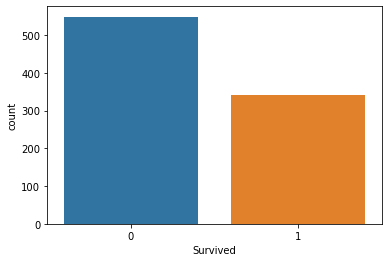

In [7]:
sns.countplot(x='Survived', data=train)

In [8]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

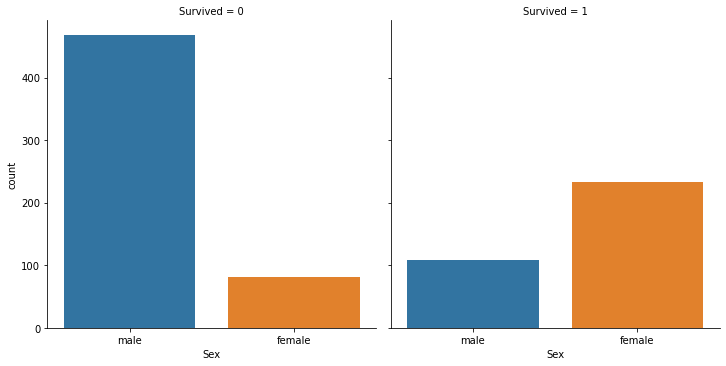

In [9]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train)

**Observation**
1. Female more likely to survive than male

In [10]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

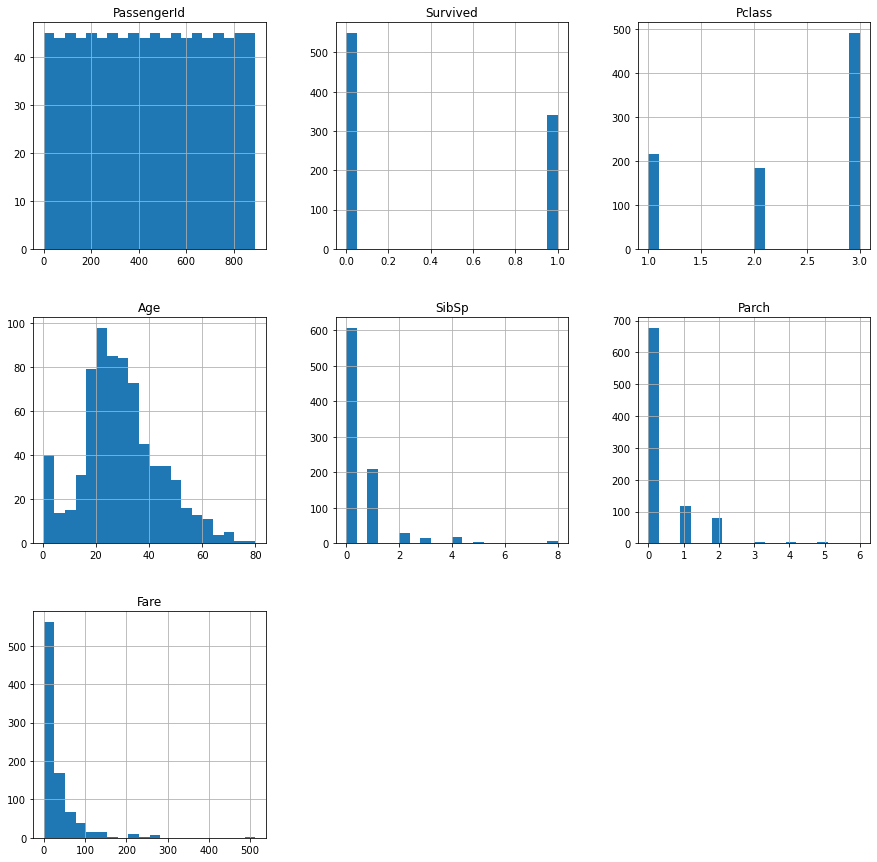

In [11]:
train.hist(figsize=(15,15), layout=(3,3), bins=20)

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.drop(['Cabin','PassengerId','Name', 'Ticket'],axis=1,inplace=True)

In [14]:
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [15]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

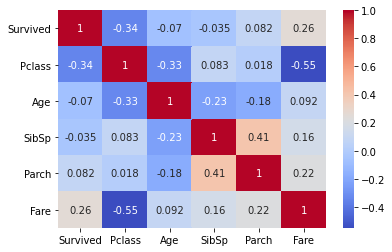

In [16]:
sns.heatmap(train.corr(), annot = True,cmap = 'coolwarm')

**Observation**
1. Survived and Fare positively correlated.
2. Survived and Pclass negatively correlated. SibSp and Parch positively correlated

In [17]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [18]:
test = pd.read_csv('../input/titanic/test.csv')
test_x = test.copy()
test.shape

(418, 11)

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mode()[0])

In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [24]:
test.drop(['Cabin','PassengerId','Name', 'Ticket'],axis=1,inplace=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for train
scaler.fit(train.drop('Survived',axis=1))
scaled_features = scaler.transform(train.drop('Survived',axis=1))
train_sc = pd.DataFrame(scaled_features, columns=train.columns[:-1])

# for test
scaler.fit(test)
scaled_features = scaler.transform(test)
test_sc = pd.DataFrame(scaled_features, columns=test.columns)

In [26]:
train_sc.head()


,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838,-0.510152,0.902587
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803,-0.510152,-1.107926
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838,-0.510152,0.902587
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838,-0.510152,-1.107926
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838,-0.510152,0.902587


In [27]:
train_sc.shape

(891, 9)

In [28]:
y = train_x['Survived']
y.shape

(891,)

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [30]:

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(train_sc,y)
scoring = "accuracy"
score1 = cross_val_score(model1, train_sc, y, cv=k_fold, n_jobs=1, scoring=scoring)
print('Accuracy of KNN',round(np.mean(score1)*100, 2))


from sklearn.svm import SVC
model2 = SVC()
model2.fit(train_sc,y)
scoring = "accuracy"
score2 = cross_val_score(model2, train_sc, y, cv=k_fold, n_jobs=1, scoring=scoring)
print('Accuracy of SVC',round(np.mean(score2)*100, 2))


from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(train_sc,y)
scoring = "accuracy"
score3 = cross_val_score(model3, train_sc, y, cv=k_fold, n_jobs=1, scoring=scoring)
print('Accuracy of DTC',round(np.mean(score3)*100, 2))


from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state=1)
model4.fit(train_sc,y)
scoring = "accuracy"
score4 = cross_val_score(model4, train_sc, y, cv=k_fold, n_jobs=1, scoring=scoring)
print('Accuracy of RFC',round(np.mean(score4)*100, 2))


from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(train_sc,y)
scoring = "accuracy"
score4 = cross_val_score(model4, train_sc, y, cv=k_fold, n_jobs=1, scoring=scoring)
print('Accuracy of LR',round(np.mean(score4)*100, 2))

Accuracy of KNN 80.59
Accuracy of SVC 82.49
Accuracy of DTC 77.55
Accuracy of RFC 81.03
Accuracy of LR 80.36


In [31]:
y.shape

(891,)

In [32]:
#SVC gave us the best accuracy
y_pred=model2.predict(test_sc)
y_pred.shape

(418,)

In [33]:
submission = pd.DataFrame({
    "PassengerId": test_x["PassengerId"],
    "Survived":y_pred
})
submission.to_csv('titanic.csv',index=False)

In [34]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
